Boston housing prediction-Project



By Anirban Saikia


Electronics and Telecommunication Engineering


Assam Engineering College,Guwahati,Assam

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

Loading the Dataset

In [2]:

boston=load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#put the data into pandas dataframe
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [5]:
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:

max(target['target'])

50.0

In [7]:
min(target['target'])

5.0

In [8]:
#concatenate features and target into a single dataframe
#axis=1 makes it concatenate columns wise
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Use describe() to generate the summary of the dataset

In [9]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Calculate correlation

In [10]:

#calculate correlation between every columns of the data
corr=df.corr('pearson')

In [11]:
#Take absolute value of the correlation
corrs=[abs(corr[attr]['target']) for attr in list(features)]
#make a list of pairs [(corrs,features)]
l=list(zip(corrs,list(features)))

In [12]:
#sort the list of pairs in reverse/descending order,
#with the correlation value as the key of sorting
l.sort(key=lambda x: x[0],reverse=True)
corrs,labels=list(zip((*l)))

In [13]:

#Plot correlations with respect to the target value as a bar graph
index=np.arange(len(labels))

([<matplotlib.axis.XTick at 0x7f22e71852e8>,
 [Text(0, 0, 'LSTAT'),
  Text(0, 0, 'RM'),
  Text(0, 0, 'PTRATIO'),
  Text(0, 0, 'INDUS'),
  Text(0, 0, 'TAX'),
  Text(0, 0, 'NOX'),
  Text(0, 0, 'CRIM'),
  Text(0, 0, 'RAD'),
  Text(0, 0, 'AGE'),
  Text(0, 0, 'ZN'),
  Text(0, 0, 'B'),
  Text(0, 0, 'DIS'),
  Text(0, 0, 'CHAS')])

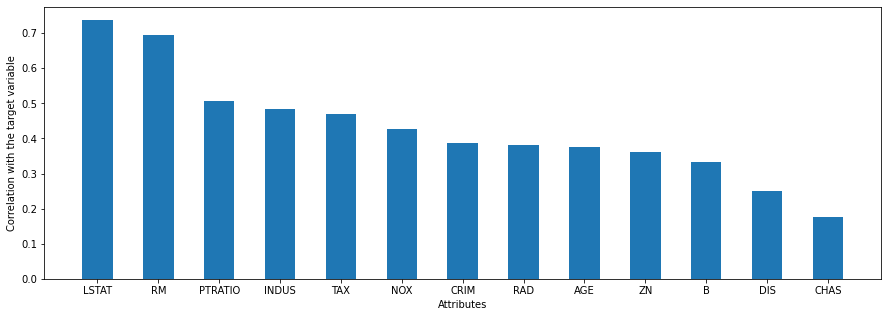

In [14]:

plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)

Normalize the data





normalize the data with MinMaxscaler

In [15]:
X=df['RM'].values
Y=df['target'].values

In [16]:

#Before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [17]:

x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [18]:
#after normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


Step 2: Define error
    
    
    
    
    
MSE- Mean squred error

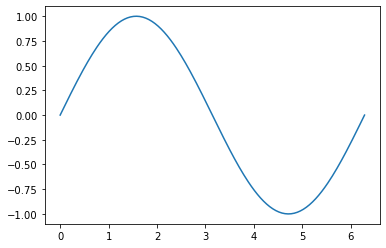

In [19]:

n=200
#Generate n evenly spaced values from zero radians to 2 PI radians
x=np.linspace(0,2*np.pi,n)
sine_values=np.sin(x)
#Plot the sine wave
plt.plot(x,sine_values)

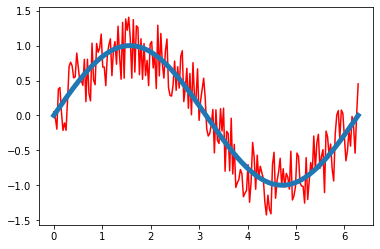

In [20]:

#Add some noisy to the sine wave
noise=0.5
noisy_sine_values=sine_values+np.random.uniform(-noise,noise,n)

plt.plot(x,noisy_sine_values,color='r')
plt.plot(x,sine_values,linewidth=5)

In [21]:
#Calculate MSE using the equation
error_value=(1/n)*sum(np.power(sine_values-noisy_sine_values,2))
error_value

0.08418533019088235

In [22]:
#Calculate MSE using the function sklearn library
mean_squared_error(sine_values,noisy_sine_values)

0.08418533019088235

the three functions that constitute the model are:
    
    
error


update



gradient_descent

In [23]:

def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)

Step 3: Split the data

In [24]:

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [25]:
def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c

In [26]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print('Error less than threshold.Stopping gradient descent')
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

In [27]:

init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001

m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

Text(0.5, 0, 'Iterations')

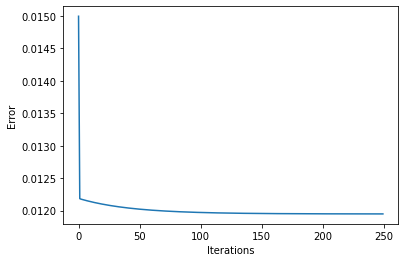

In [28]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

Animation

In [29]:
mc_values_anim=mc_values[0:250:5]

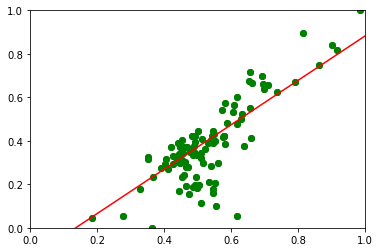

In [30]:
fig,ax=plt.subplots()
ln,=plt.plot([],[],'ro-',animated=True)

def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,


def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m*-.5+c
    x2,y2=1.5,m*1.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim=FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)
HTML(anim.to_html5_video())


Visualization the learning process

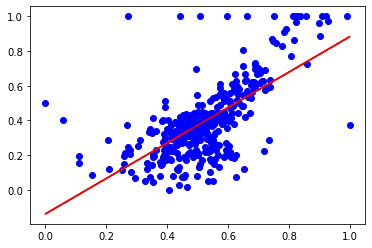

In [31]:

plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')

Text(0.5, 0, 'Iterations')

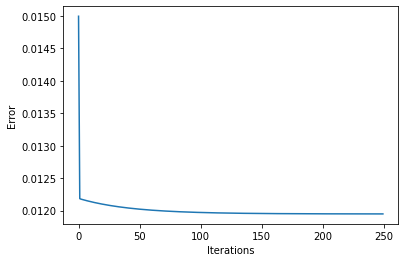

In [32]:

plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel("Error")
plt.xlabel('Iterations')


Step 5 : Prediction

In [33]:
predicted=(m*xtest)+c

In [34]:
mean_squared_error(ytest,predicted)

0.0123603802667532

In [35]:

p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target','predicted'])
p.head()

,x,target,predicted
0,0.353133,0.317778,0.221689
1,0.457559,0.342222,0.328350
2,0.555662,0.102222,0.428553
3,0.578272,0.424444,0.451647
4,0.365396,0.235556,0.234214


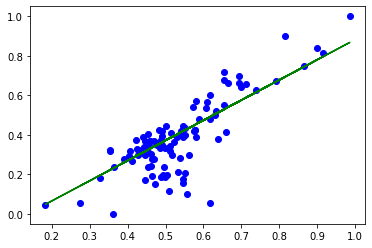

In [36]:

plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='g')

Revert Normalization

In [37]:
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

#this is to remove the extra dimension
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])

In [38]:
p.head()

,x,target_y,predicted_y
0,5.404,19.3,14.976001
1,5.949,20.4,19.775767
2,6.461,9.6,24.284905
3,6.579,24.1,25.324121
4,5.468,15.6,15.539643


The project is complete